In [220]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [221]:
user = pd.read_csv('data_new/all_AU.csv',sep=',')
user['recency']=abs(user['recency'])
user.head(10)
#751328

,user_id,username,last_activity,register_date,register_year,user_age,recency,fre_cmt,count_thread
0,99673,LIENHUONG,2018-10-29,2008-08-27 02:53:00.000,2008,33,0,85627,30811
1,3,cuhiep,2018-10-29,2006-04-27 14:47:00.000,2006,39,0,33930,18182
2,39792,Duy Luân,2018-10-29,2008-02-16 16:50:00.000,2008,25,0,43381,22309
3,210010,crazysexycool1981,2018-10-29,2009-03-28 04:13:51.000,2009,37,0,35382,5538
4,752102,ptvd1994,2018-10-29,2011-03-14 07:13:47.000,2011,24,0,40431,20852
5,40900,bibinguyen,2018-10-29,2008-02-21 04:56:48.000,2008,24,0,24888,15389
6,28591,vvvvvv,2018-09-13,2007-12-20 12:23:19.000,2007,80,46,32172,16284
7,570652,thecuong_87,2018-10-28,2010-08-08 12:12:39.000,2010,31,1,29741,10166
8,285390,kecodon0077,2018-10-23,2009-07-22 15:31:00.000,2009,45,6,25511,522
9,1140038,thachnhattrung,2018-10-29,2012-02-20 14:17:45.000,2012,31,0,28751,13996


In [288]:
user.describe()

,user_id,register_year,user_age,recency,fre_cmt,count_thread
count,7.508540e+05,750854.000000,750854.000000,750854.000000,750854.000000,750854.000000
mean,1.271873e+06,2012.316116,33.612428,1454.533522,39.255963,19.794362
std,7.781214e+05,2.905379,89.982790,923.361700,283.893576,129.508720
min,1.000000e+00,2006.000000,0.000000,0.000000,1.000000,1.000000
25%,5.456402e+05,2010.000000,25.000000,672.000000,1.000000,1.000000
50%,1.320693e+06,2012.000000,28.000000,1477.000000,4.000000,2.000000
75%,1.983309e+06,2014.000000,33.000000,2149.000000,14.000000,8.000000
max,2.492954e+06,2018.000000,2018.000000,4520.000000,85627.000000,30811.000000


In [222]:
user_1= user[user['last_activity']>='2017-06-01']
user_1 = pd.DataFrame(data=user_1, columns=['user_id','username','last_activity','recency','fre_cmt','count_thread'])
user_1['recency']=abs(user_1['recency'])
user_1.head(10)

,user_id,username,last_activity,recency,fre_cmt,count_thread
0,99673,LIENHUONG,2018-10-29,0,85627,30811
1,3,cuhiep,2018-10-29,0,33930,18182
2,39792,Duy Luân,2018-10-29,0,43381,22309
3,210010,crazysexycool1981,2018-10-29,0,35382,5538
4,752102,ptvd1994,2018-10-29,0,40431,20852
5,40900,bibinguyen,2018-10-29,0,24888,15389
6,28591,vvvvvv,2018-09-13,46,32172,16284
7,570652,thecuong_87,2018-10-28,1,29741,10166
8,285390,kecodon0077,2018-10-23,6,25511,522
9,1140038,thachnhattrung,2018-10-29,0,28751,13996


In [223]:
user_1.describe()

,user_id,recency,fre_cmt,count_thread
count,1.561540e+05,156154.000000,156154.000000,156154.000000
mean,1.663835e+06,203.674149,102.660316,54.505251
std,8.499313e+05,157.191124,549.378449,261.653891
min,1.000000e+00,0.000000,1.000000,1.000000
25%,8.958170e+05,58.000000,2.000000,1.000000
50%,2.079513e+06,176.000000,8.000000,5.000000
75%,2.386810e+06,339.000000,47.000000,29.000000
max,2.492954e+06,515.000000,85627.000000,30811.000000


In [224]:
#quantiles = user_1.quantile(q=[0.25,0.5,0.75])
quantiles = user_1.quantile(q=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
quantiles = pd.DataFrame(data =quantiles, columns=['recency','fre_cmt','count_thread'])
quantiles
# 75%: 192 days: 6 months
# 50%: 98 days: 3 months

,recency,fre_cmt,count_thread
0.2,41.0,1.0,1.0
0.3,77.0,2.0,2.0
0.4,123.0,4.0,3.0
0.5,176.0,8.0,5.0
0.6,236.0,16.0,10.0
0.7,303.0,32.0,20.0
0.8,374.0,71.0,42.0
0.9,439.0,197.0,109.0


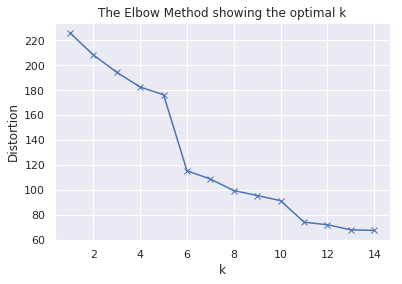

In [225]:
###### Plot RECENCY+FREQUENCY ####
x1 = np.array(user_1['recency'])
x2 = np.array(user_1['fre_cmt'])
x3 = np.array(user_1['count_thread'])
# create new plot and data
plt.plot()
#X = np.array(list(zip(x1,x2,x3))).reshape(len(x1), 3)
X = np.array(list(zip(x1,x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Histogram of Recency


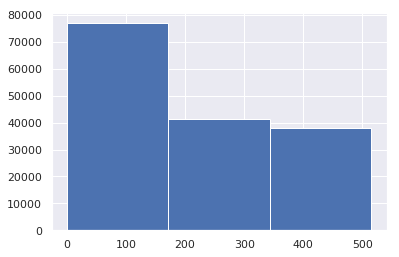

Histogram of Frequency


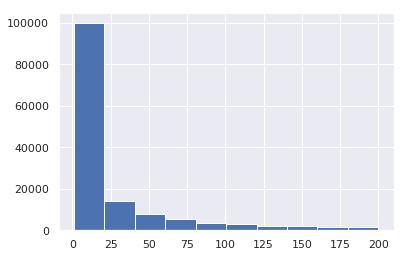

In [226]:
import seaborn as sns
sns.set()
print('Histogram of Recency')
plt.hist(user_1['recency'], bins =3)
plt.show()
print('Histogram of Frequency')
fre_cmt_range = user_1[user_1['fre_cmt']<=200]
plt.hist(fre_cmt_range['fre_cmt'], bins =10)
plt.show()

In [227]:
a= user_1[user_1['recency']<180] #
b= user_1[user_1['recency']>=180] #
c= user_1[user_1['fre_cmt']<70] #
d= user_1[user_1['fre_cmt']>=70] #
e= user_1[(user_1['recency']>=180) & (user_1['fre_cmt']>=70)] #
print('recency <180:',len(a)*100/len(user_1))
print('recency >=180:',len(b)*100/len(user_1))
print('fre_cmt <47:',len(c)*100/len(user_1))
print('fre_cmt >=47:',len(d)*100/len(user_1))
print('recency>180 & fre_cmt >=70:',len(e)*100/len(user_1))

recency <180: 50.564186636269326
recency >=180: 49.435813363730674
fre_cmt <47: 79.7917440475428
fre_cmt >=47: 20.20825595245719
recency>180 & fre_cmt >=70: 6.441077397953302


In [228]:
#quantiles_1 = user_1.quantile(q=[0.25,0.5,0.75])
#quantiles_1 = pd.DataFrame(data = quantiles_1, columns = ['recency','fre_cmt','count_thread'])
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.2: 41.0,
  0.3: 77.0,
  0.4: 123.0,
  0.5: 176.0,
  0.6: 236.0,
  0.7: 303.0,
  0.8: 374.0,
  0.9: 439.0},
 'fre_cmt': {0.2: 1.0,
  0.3: 2.0,
  0.4: 4.0,
  0.5: 8.0,
  0.6: 16.0,
  0.7: 32.0,
  0.8: 71.0,
  0.9: 197.0},
 'count_thread': {0.2: 1.0,
  0.3: 2.0,
  0.4: 3.0,
  0.5: 5.0,
  0.6: 10.0,
  0.7: 20.0,
  0.8: 42.0,
  0.9: 109.0}}

In [229]:
def FreThre_Class(x,p,d):
    if x <= d[p][0.2]:
        return 6
    elif x <= d[p][0.4]:
        return 5
    elif x <= d[p][0.5]: 
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1
    
def Re_Class(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.5]: 
        return 3
    elif x <= d[p][0.6]: 
        return 4
    elif x <= d[p][0.8]: 
        return 5
    else:
        return 6


In [230]:
user_1['Recency_Group'] = user_1['recency'].apply(Re_Class, args=('recency',quantiles,))
user_1['Frequency_Group'] = user_1['fre_cmt'].apply(FreThre_Class, args=('fre_cmt',quantiles,))
user_1['Thread_Group'] = user_1['count_thread'].apply(FreThre_Class, args=('count_thread',quantiles,))
user_1.head(10)

,user_id,username,last_activity,recency,fre_cmt,count_thread,Recency_Group,Frequency_Group,Thread_Group
0,99673,LIENHUONG,2018-10-29,0,85627,30811,1,1,1
1,3,cuhiep,2018-10-29,0,33930,18182,1,1,1
2,39792,Duy Luân,2018-10-29,0,43381,22309,1,1,1
3,210010,crazysexycool1981,2018-10-29,0,35382,5538,1,1,1
4,752102,ptvd1994,2018-10-29,0,40431,20852,1,1,1
5,40900,bibinguyen,2018-10-29,0,24888,15389,1,1,1
6,28591,vvvvvv,2018-09-13,46,32172,16284,2,1,1
7,570652,thecuong_87,2018-10-28,1,29741,10166,1,1,1
8,285390,kecodon0077,2018-10-23,6,25511,522,1,1,1
9,1140038,thachnhattrung,2018-10-29,0,28751,13996,1,1,1


In [237]:
user_1['RFM'] = user_1['Recency_Group'].map(str) + user_1['Frequency_Group'].map(str) + user_1['Thread_Group'].map(str)
user_1.head(10)

,user_id,username,last_activity,recency,fre_cmt,count_thread,Recency_Group,Frequency_Group,Thread_Group,RFM
0,99673,LIENHUONG,2018-10-29,0,85627,30811,1,1,1,111
1,3,cuhiep,2018-10-29,0,33930,18182,1,1,1,111
2,39792,Duy Luân,2018-10-29,0,43381,22309,1,1,1,111
3,210010,crazysexycool1981,2018-10-29,0,35382,5538,1,1,1,111
4,752102,ptvd1994,2018-10-29,0,40431,20852,1,1,1,111
5,40900,bibinguyen,2018-10-29,0,24888,15389,1,1,1,111
6,28591,vvvvvv,2018-09-13,46,32172,16284,2,1,1,211
7,570652,thecuong_87,2018-10-28,1,29741,10166,1,1,1,111
8,285390,kecodon0077,2018-10-23,6,25511,522,1,1,1,111
9,1140038,thachnhattrung,2018-10-29,0,28751,13996,1,1,1,111


In [238]:
longtimereturn_sample = user_1[(user_1['Recency_Group']>=4) & (user_1['Frequency_Group']==1)]
print('recency<180 & fre_cmt >=70:',len(longtimereturn_sample)*100/len(user_1))


recency<180 & fre_cmt >=70: 6.396890249369212


In [239]:
check = user_1[(user_1['recency']>=180) & (user_1['fre_cmt']>=70)]
print('recency<180 & fre_cmt >=70:',len(check)*100/len(user_1))

recency<180 & fre_cmt >=70: 6.441077397953302


In [240]:
count_group= user_1.groupby(['Recency_Group','Frequency_Group'])['user_id'].count()
count_group= pd.DataFrame(count_group).reset_index()
count_group
# 31* & 41* = 13319

,Recency_Group,Frequency_Group,user_id
0,1,1,12781
1,1,2,7191
2,1,3,2596
3,1,4,2264
4,1,5,3389
5,1,6,3032
6,2,1,5937
7,2,2,6148
8,2,3,3178
9,2,4,3134


In [241]:
#### Apply for all users 
longtimenoreturn = user[(user['recency']>=180) & (user['fre_cmt']>=70)]
print('recency<180 & fre_cmt >=70:',len(longtimenoreturn)*100/len(user))
longtimenoreturn.describe()

recency<180 & fre_cmt >=70: 5.788209159170758


,user_id,register_year,user_age,recency,fre_cmt,count_thread
count,4.346100e+04,43461.000000,43461.000000,43461.000000,43461.000000,43461.000000
mean,7.748722e+05,2010.471871,33.135639,1179.748096,291.304641,121.475070
std,6.286759e+05,2.170424,67.733356,709.994563,596.019352,221.067024
min,2.000000e+00,2006.000000,1.000000,180.000000,70.000000,1.000000
25%,2.027420e+05,2009.000000,27.000000,554.000000,95.000000,40.000000
50%,6.430070e+05,2010.000000,30.000000,1097.000000,145.000000,68.000000
75%,1.239717e+06,2012.000000,34.000000,1709.000000,271.000000,124.000000
max,2.421662e+06,2018.000000,2018.000000,3889.000000,28699.000000,10674.000000


In [242]:
user_kmeans=user_1
user_kmeans.head()

,user_id,username,last_activity,recency,fre_cmt,count_thread,Recency_Group,Frequency_Group,Thread_Group,RFM
0,99673,LIENHUONG,2018-10-29,0,85627,30811,1,1,1,111
1,3,cuhiep,2018-10-29,0,33930,18182,1,1,1,111
2,39792,Duy Luân,2018-10-29,0,43381,22309,1,1,1,111
3,210010,crazysexycool1981,2018-10-29,0,35382,5538,1,1,1,111
4,752102,ptvd1994,2018-10-29,0,40431,20852,1,1,1,111


In [250]:
user_kmeans = pd.DataFrame(data=user_kmeans, columns=['user_id','username','last_activity','recency','fre_cmt','count_thread',\
'Recency_Group','Frequency_Group','Thread_Group','RFM'])
user_kmeans.head()

,user_id,username,last_activity,recency,fre_cmt,count_thread,Recency_Group,Frequency_Group,Thread_Group,RFM
0,99673,LIENHUONG,2018-10-29,0,85627,30811,1,1,1,111
1,3,cuhiep,2018-10-29,0,33930,18182,1,1,1,111
2,39792,Duy Luân,2018-10-29,0,43381,22309,1,1,1,111
3,210010,crazysexycool1981,2018-10-29,0,35382,5538,1,1,1,111
4,752102,ptvd1994,2018-10-29,0,40431,20852,1,1,1,111


In [255]:

from sklearn.cluster import KMeans
#K means Clustering 
def doKmeans(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X, 6)
print(clust_labels, cent)

[4 5 5 ... 0 0 0] [[3.69526630e+02 2.98594162e+01]
 [8.89202733e+01 5.33111162e+03]
 [9.01621297e+01 6.29503162e+01]
 [9.34945518e+01 1.36188113e+03]
 [0.00000000e+00 8.56270000e+04]
 [5.37096774e+01 2.12145806e+04]]


In [259]:
user_kmeans = pd.DataFrame(data=user_kmeans, columns=['user_id','username','last_activity','recency','fre_cmt','count_thread',\
'Recency_Group','Frequency_Group','Thread_Group','RFM'])
kmeans = pd.DataFrame(clust_labels)
user_kmeans.insert((user_kmeans.shape[1]),'kmeans',kmeans)
user_kmeans.head(100)

,user_id,username,last_activity,recency,fre_cmt,count_thread,Recency_Group,Frequency_Group,Thread_Group,RFM,kmeans
0,99673,LIENHUONG,2018-10-29,0,85627,30811,1,1,1,111,4.0
1,3,cuhiep,2018-10-29,0,33930,18182,1,1,1,111,5.0
2,39792,Duy Luân,2018-10-29,0,43381,22309,1,1,1,111,5.0
3,210010,crazysexycool1981,2018-10-29,0,35382,5538,1,1,1,111,5.0
4,752102,ptvd1994,2018-10-29,0,40431,20852,1,1,1,111,5.0
5,40900,bibinguyen,2018-10-29,0,24888,15389,1,1,1,111,5.0
6,28591,vvvvvv,2018-09-13,46,32172,16284,2,1,1,211,5.0
7,570652,thecuong_87,2018-10-28,1,29741,10166,1,1,1,111,5.0
8,285390,kecodon0077,2018-10-23,6,25511,522,1,1,1,111,5.0
9,1140038,thachnhattrung,2018-10-29,0,28751,13996,1,1,1,111,5.0


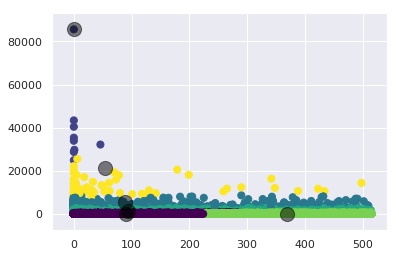

In [258]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = cent
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [286]:
user_kmeans_1 = pd.DataFrame(data= user_kmeans, columns = ['kmeans','recency','fre_cmt'])
cl0= pd.DataFrame(user_kmeans_1[user_kmeans_1['kmeans']==0])
cl1= user_kmeans_1[user_kmeans_1['kmeans']==1]
cl2= user_kmeans_1[user_kmeans_1['kmeans']==2]
cl3= user_kmeans_1[user_kmeans_1['kmeans']==3]
cl4= user_kmeans_1[user_kmeans_1['kmeans']==4]
cl5= user_kmeans_1[user_kmeans_1['kmeans']==5]

#cl0.describe()
#cl1.describe()
#cl2.describe()
#cl3.describe()
cl4.describe()
#cl5.describe()

,kmeans,recency,fre_cmt
count,1.0,1.0,1.0
mean,4.0,0.0,85627.0
std,NaN,NaN,NaN
min,4.0,0.0,85627.0
25%,4.0,0.0,85627.0
50%,4.0,0.0,85627.0
75%,4.0,0.0,85627.0
max,4.0,0.0,85627.0


In [267]:
#count_group= user_kmeans.groupby(['kmeans','Recency_Group','Frequency_Group'])['user_id'].count()
count_group= user_kmeans.groupby(['kmeans'])['user_id'].count()
#,'Recency_Group','Frequency_Group'
count_group= pd.DataFrame(count_group).reset_index()
count_group

,kmeans,user_id
0,0.0,21597
1,1.0,376
2,2.0,33609
3,3.0,3066
4,4.0,1
5,5.0,29


In [262]:

cl0= count_group[count_group['kmeans']==0]
cl1= count_group[count_group['kmeans']==1]
cl2= count_group[count_group['kmeans']==2]
cl3= count_group[count_group['kmeans']==3]
cl4= count_group[count_group['kmeans']==4]
cl5= count_group[count_group['kmeans']==5]
'''
print(cl0.head(71))
print(cl1.head(71))
print(cl2.head(71))
print(cl3.head(71))
print(cl4.head(71))
print(cl5.head(71))
'''
print(cl0.describe())
print(cl1.describe())
print(cl2.describe())
print(cl3.describe())
print(cl4.describe())
print(cl5.describe())

       kmeans  Recency_Group  Frequency_Group      user_id
count    26.0       26.00000        26.000000    26.000000
mean      0.0        3.50000         2.692308   830.653846
std       0.0        1.81659         1.289007  1047.443781
min       0.0        1.00000         1.000000     1.000000
25%       0.0        2.00000         2.000000     6.250000
50%       0.0        3.50000         3.000000   118.500000
75%       0.0        5.00000         4.000000  1271.750000
max       0.0        6.00000         5.000000  3096.000000
       kmeans  Recency_Group  Frequency_Group     user_id
count     6.0       6.000000              6.0    6.000000
mean      1.0       3.500000              1.0   62.666667
std       0.0       1.870829              0.0  101.869852
min       1.0       1.000000              1.0   12.000000
25%       1.0       2.250000              1.0   17.250000
50%       1.0       3.500000              1.0   21.500000
75%       1.0       4.750000              1.0   31.750000
max  

In [ ]:
R↑F↑M↑ Best
R↑F↑M↑ Valuable
R↑F↑M↓ Shopper
R↑F↓M↓ FirstTime
R↓F↑M↑ Churn
R↓F↑M↓ Frequent
R↓F↓M↑ Spenders
R↓F↓M↓ Uncertain